Importing the Dependencies

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers_dataset.csv')

In [45]:
# first 5 rows in the dataframe
customer_data.head()

,Annual Income (k$),Spending Score (1-100)
0,43.408295,60.802434
1,61.511165,50.098610
2,58.651383,44.789913
3,48.176910,40.403709
4,69.914981,38.420757


In [46]:
# finding the number of rows and columns
customer_data.shape

(1000, 2)

In [47]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Annual Income (k$)      1000 non-null   float64
 1   Spending Score (1-100)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [48]:
# checking for missing values
customer_data.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [49]:
X = customer_data.iloc[:,:].values

In [50]:
print(X)

[[43.40829493 60.80243368]
 [61.5111654  50.0986099 ]
 [58.65138313 44.78991272]
 ...
 [23.74340267 13.33453824]
 [22.12970092 12.04475704]
 [22.4730863  -3.69462043]]


In [51]:
# 2. Initialize and Apply Standard Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [52]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

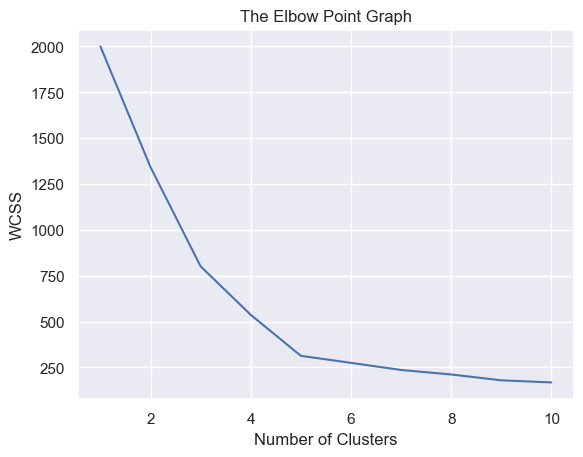

In [53]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [54]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3
 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0
 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 1 3 0 3 0 3 3 3 3 3 3 1 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

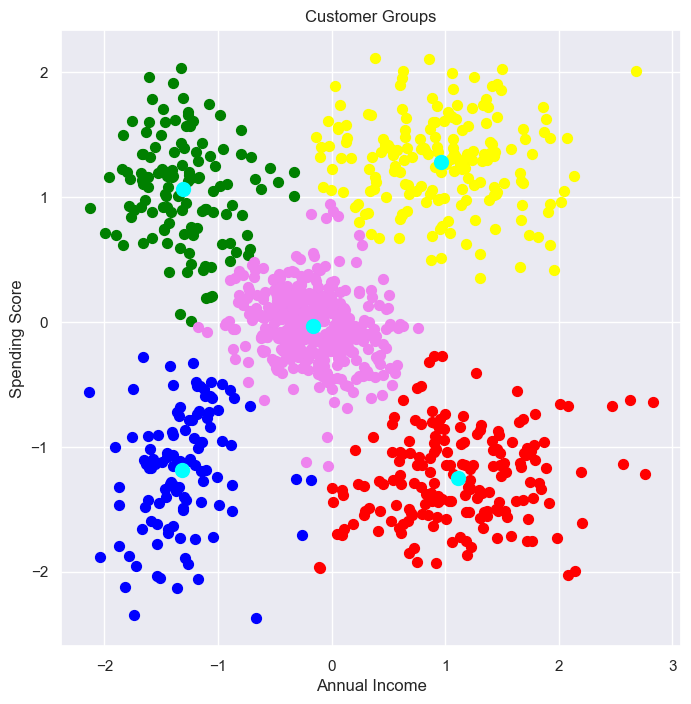

In [55]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [56]:
import pickle

# Save the model
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# SAVE THE SCALER (This is the missing piece for the app!)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!
